# Lesson 4 Python Hands on

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [4]:
# Load Data
avocado = pd.read_csv('C:/Users/chris/Desktop/data/DS105/Lesson4/avocados.csv')

### Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

### Null Hypothesis, The null hypothesis is that the volume is the same between Indianapolis, Orlando, and PhoenixTucson

# Data Wrangling and Exploration

In [5]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.region.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [7]:
# Subset/Reduce Regions to desired regions for analysis
desiredRegions = ['Indianapolis', 'Orlando', 'PhoenixTucson']

In [9]:
desiredRegions1 = avocado['region'].isin(desiredRegions) 

In [10]:
desiredRegions1.head()

0    False
1    False
2    False
3    False
4    False
Name: region, dtype: bool

In [14]:
avocado1 = avocado[desiredRegions1].copy()

##  Recode Regions with numeric value as 

 0 = Indianapolis
 1 = Orlando    
 2 = PhoenixTucson    

In [23]:
def CityRecode(series):
    if series == 'Indianapolis':
        return 0
    if series == 'Orlando':
        return 1
    if series == 'PhoenixTucson':
        return 2

avocado1['regionR'] = avocado1.region.apply(CityRecode)

In [24]:
# recode Total Volume to volume
avocado1['volume'] = avocado1['Total Volume']

In [25]:
avocado1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,volume,regionR
988,0,12/27/2015,1.04,123096.09,4647.28,69384.73,11206.40,37857.68,20644.64,11524.06,5688.98,conventional,2015,Indianapolis,123096.09,0
989,1,12/20/2015,1.10,116353.68,3702.20,67983.94,9327.71,35339.83,18144.63,12133.67,5061.53,conventional,2015,Indianapolis,116353.68,0
990,2,12/13/2015,1.03,125342.89,4904.51,69984.32,11398.44,39055.62,21259.82,15580.08,2215.72,conventional,2015,Indianapolis,125342.89,0
991,3,12/6/2015,0.92,145740.44,4067.00,89452.99,13570.12,38650.33,19365.92,17733.68,1550.73,conventional,2015,Indianapolis,145740.44,0
992,4,11/29/2015,1.08,108444.41,3079.44,65254.08,10854.59,29256.30,17455.74,9975.21,1825.35,conventional,2015,Indianapolis,108444.41,0


In [26]:
# Confirm the regions are reduced to working regions
avocado1.region.value_counts()

region
Indianapolis     338
Orlando          338
PhoenixTucson    338
Name: count, dtype: int64

In [28]:
# Subset data for only DV and IV for Assumptions and analysis
avocado2 = avocado1[['volume','regionR']]

In [29]:
avocado2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 988 to 18008
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   volume   1014 non-null   float64
 1   regionR  1014 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.8 KB


# Assumptions

C:\Users\chris\AppData\Local\Temp\ipykernel_26744\3116085633.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado2.volume)


<AxesSubplot: xlabel='volume', ylabel='Density'>

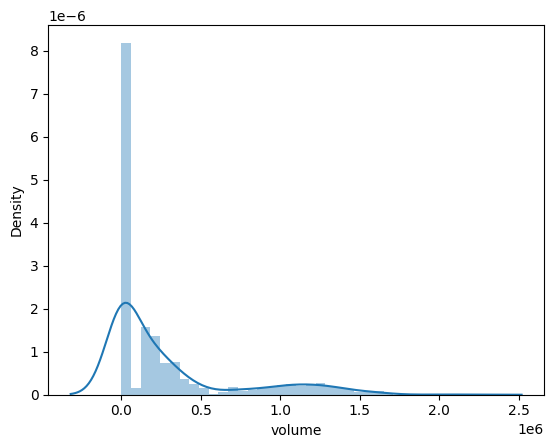

In [30]:
# n > 20    Sample size is acceptable

# Normality
sns.distplot(avocado2.volume)

Not Normal With Positive Skew

In [31]:
# Square Root transformation
avocado2['volumeSQRT'] = np.sqrt(avocado2['volume'])

C:\Users\chris\AppData\Local\Temp\ipykernel_26744\3759094511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado2['volumeSQRT'] = np.sqrt(avocado2['volume'])


C:\Users\chris\AppData\Local\Temp\ipykernel_26744\1781715412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado2.volumeSQRT)


<AxesSubplot: xlabel='volumeSQRT', ylabel='Density'>

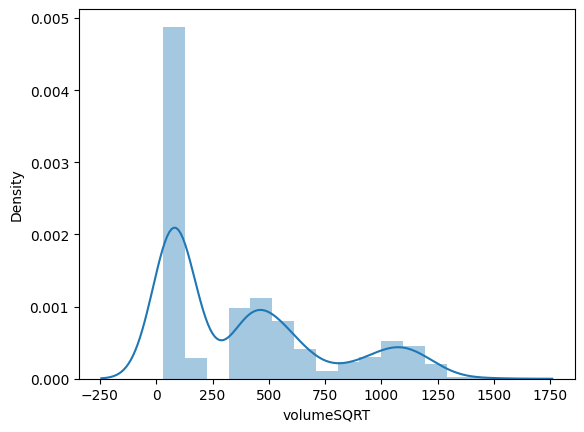

In [32]:
sns.distplot(avocado2.volumeSQRT)

This one is not much better.

In [33]:
# Logarithmic Transformation
avocado2['volumeLOG'] = np.log(avocado2['volume'])

C:\Users\chris\AppData\Local\Temp\ipykernel_26744\228692215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado2['volumeLOG'] = np.log(avocado2['volume'])


C:\Users\chris\AppData\Local\Temp\ipykernel_26744\2126638009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado2.volumeLOG)


<AxesSubplot: xlabel='volumeLOG', ylabel='Density'>

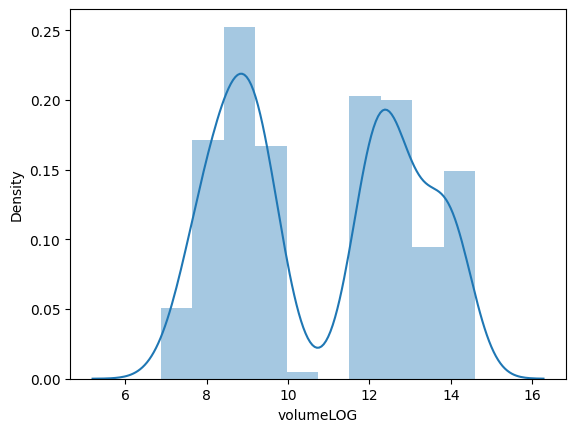

In [34]:
sns.distplot(avocado2.volumeLOG)

#### There is not really a great option for normal data in this case

In [42]:
# Homogeneity of Variance

# Bartletts Test 
scipy.stats.bartlett(avocado2.volume, avocado2.regionR)

BartlettResult(statistic=25236.742336926767, pvalue=0.0)

In [43]:
# Homogeneity of Variance

# Bartletts Test 
scipy.stats.bartlett(avocado2.volumeLOG, avocado2.regionR)

BartlettResult(statistic=883.7919675933721, pvalue=3.2755760094735546e-194)

In [44]:
# Homogeneity of Variance

# Bartletts Test 
scipy.stats.bartlett(avocado2.volumeSQRT, avocado2.regionR)

BartlettResult(statistic=10955.970638486806, pvalue=0.0)

In [46]:
# Fligners Test 
scipy.stats.fligner(avocado2.volume, avocado2.regionR)

FlignerResult(statistic=1280.3498904524556, pvalue=2.1061583618009585e-280)

In [47]:
# Fligners Test 
scipy.stats.fligner(avocado2.volumeSQRT, avocado2.regionR)

FlignerResult(statistic=1280.3498906727314, pvalue=2.1061581296521129e-280)

In [48]:
# Fligners Test 
scipy.stats.fligner(avocado2.volumeLOG, avocado2.regionR)

FlignerResult(statistic=1106.1971206828098, pvalue=1.4858650815524343e-242)

### The pvalue is less than .05 for every possible combination of the tested as non-parametric data and normally distributed. The data does not pass for Homogeity of Variance

# ANOVA
Testing despite Homegeneity 

In [55]:
stats.f_oneway(avocado2['volume'][avocado2['regionR'] == 0],
              avocado2['volume'][avocado2['regionR'] == 1],
              avocado2['volume'][avocado2['regionR'] == 2])

F_onewayResult(statistic=174.05378837225294, pvalue=1.1012762564576868e-65)

Pvalue is significantly different between cities so the null hypothesis is rejected. 

# Post Hoc

In [59]:
# Create postHoc to assign variables for Tukey function
postHOC = MultiComparison(avocado2.volume, avocado2.regionR)

In [60]:
postHocResults = postHOC.tukeyhsd()

In [61]:
print(postHocResults)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  84015.7173 0.0079  18188.0124 149843.4223   True
     0      2 489289.7073    0.0 423462.0024 555117.4123   True
     1      2   405273.99    0.0  339446.285 471101.6949   True
---------------------------------------------------------------


### Each Column is rejected indicating there is a significant differnece


In [64]:
# Look at the means
avocado2.groupby('regionR').mean()

#  0 = Indianapolis
#  1 = Orlando    
#  2 = PhoenixTucson 

,volume,volumeSQRT,volumeLOG
regionR,,,
0,89536.661036,240.446599,10.157564
1,173552.378373,324.645892,10.586744
2,578826.368343,585.837880,11.634171


## PhoenixTucson appears to have the highest mean of volume out of the 3 regions.PhoenixTucson has more than 6 times the volume of Indianapolis having the lowest mean and more than 3 times the volume of Orlando. 